# Covid-19 México

**Fuente**: https://www.gob.mx/salud/documentos/datos-abiertos-152127 

## I. Importing data:

In [260]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import copy

In [273]:
# Import data
day = input("YYMMDD:")
path = "C:/Users/jpolancoroque/Desktop/Project Covid/Libelo/Data/Covid/Bases/" + day + "COVID19MEXICO.csv"
raw_data = pd.read_csv(path,encoding= 'unicode_escape')
df = raw_data.copy()

YYMMDD:200727


In [276]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-07-27,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-07-27,0e50ac,2,4,9,2,9,9,5,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2,2020-07-27,1dd91c,2,4,8,1,8,8,37,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-07-27,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-07-27,19d3e0,2,3,27,2,27,27,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97


## II. Positivos y Muertes:

In [277]:
# Positivos
positivos = df[df["RESULTADO"] == 1]
p_df = copy.copy(positivos)

print("Positivos:",len(p_df))

Positivos: 395489


In [278]:
# Muertos
muertos = df[df["FECHA_DEF"] != '9999-99-99'][df["RESULTADO"] == 1]
m_df = copy.copy(muertos)

print("Muertos:",len(m_df))
print("Porcentaje de muerte:",round((len(m_df)/len(p_df))*100,1))

Muertos: 44022
Porcentaje de muerte: 11.1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [279]:
# Vivos
vivos = df[df["FECHA_DEF"] == '9999-99-99'][df["RESULTADO"] == 1]
v_df = copy.copy(vivos)

print("Curados:",len(v_df))
print("Porcentaje de recuperaciôn:",round((len(v_df)/len(p_df))*100,1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Curados: 351467
Porcentaje de recuperaciôn: 88.9


In [280]:
# Table
#m_df["INTUBADO"].value_counts()

In [281]:
# Table
#v_df["INTUBADO"].value_counts()

## III. Series de Tiempo

In [282]:
# Positivos tabla
p_df2 = copy.copy(p_df[['FECHA_INGRESO', 'ID_REGISTRO']])

In [283]:
# Creando una tabla de series de tiempo
p_df2['FECHA_INGRESO'] = pd.to_datetime(p_df['FECHA_INGRESO'])
#.dt.strftime('%d-%m-%Y')

In [284]:
p_df3 = pd.DataFrame(copy.copy(p_df2['FECHA_INGRESO'].value_counts()))

In [285]:
positivos_final = p_df3.sort_index(axis = 0)
positivos_final.columns = ["Nuevos casos diarios"]

In [295]:
positivos_final.tail(10)

,Nuevos casos diarios
2020-07-18,3486
2020-07-19,2552
2020-07-20,6798
2020-07-21,5831
2020-07-22,4554
2020-07-23,3237
2020-07-24,1964
2020-07-25,454
2020-07-26,63
2020-07-27,9


In [299]:
# Datos confirmados
positivos_final_conf = positivos_final.iloc[:142,:]

positivos_final_conf.tail()

,Nuevos casos diarios
2020-07-14,7197
2020-07-15,7364
2020-07-16,6969
2020-07-17,6553
2020-07-18,3486


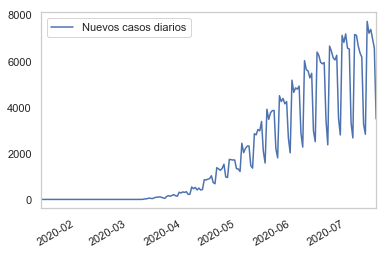

In [300]:
positivos_final_conf.plot(grid=False)
plt.show()

**Nuevo casos mensuales:**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  


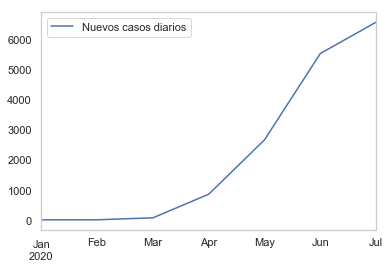

In [302]:
# Mediana Nuevos casos diarios
mensual_positivos = positivos_final_conf.resample(rule='M',how='median')
mensual_positivos.plot(grid=False)
plt.show()

In [312]:
# 30 dîas estimado casos
a = positivos_final_conf.resample(rule='M',how='sum')
a['días del mes'] = [31,29,31,30,31,30,17]
a['promedio al día'] = round((a['Nuevos casos diarios']*30)/a['días del mes'],0)

a.columns = ['Suma del mes', 'Días del mes', 'Contagios 30 días normalizado']
a['Cambio porcentual vs el día anterior (%)'] = round((a["Suma del mes"].pct_change())*100,0)

a

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


,Suma del mes,Días del mes,Contagios 30 días normalizado,Cambio porcentual vs el día anterior (%)
2020-01-31,2,31,2.0,NaN
2020-02-29,7,29,7.0,250.0
2020-03-31,2515,31,2434.0,35829.0
2020-04-30,26217,30,26217.0,942.0
2020-05-31,85628,31,82866.0,227.0
2020-06-30,150675,30,150675.0,76.0
2020-07-31,104983,17,185264.0,-30.0


In [326]:
a.index = ["Jan","Feb","Mar","Apr","May","Jun","Jul"]
c = pd.DataFrame(a.iloc[1:-1,-1])
c

,Cambio porcentual vs el día anterior (%)
Feb,250.0
Mar,35829.0
Apr,942.0
May,227.0
Jun,76.0


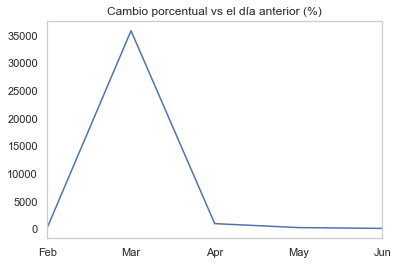

In [327]:
# Acelaraciôn
c["Cambio porcentual vs el día anterior (%)"].plot(grid=False)
plt.title("Cambio porcentual vs el día anterior (%)")
plt.show()

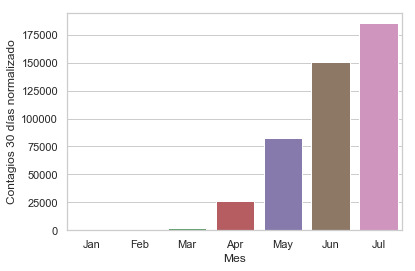

In [333]:
a_plot = pd.DataFrame(a["Contagios 30 días normalizado"])
a_plot = a_plot.reset_index()
a_plot.columns = ["Mes", "Contagios 30 días normalizado"]
a_plot["Mes"] = ["Jan","Feb","Mar","Apr","May","Jun","Jul"]

sns.set(style="whitegrid")
data = a_plot
ax = sns.barplot(x="Mes", y="Contagios 30 días normalizado", data = data)

In [305]:
b = positivos_final_conf.resample(rule='M',how='count')
b

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


,Nuevos casos diarios
2020-01-31,2
2020-02-29,3
2020-03-31,28
2020-04-30,30
2020-05-31,31
2020-06-30,30
2020-07-31,18


In [306]:
cambios_pct_mensual = mensual_positivos.pct_change()